# Proyecto 2: EDA Ingresos Públicos de Brasil
## 2. Limpieza

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys 

sys.path.append("..")
from src.func import subcategory

In [3]:
df = pd.read_csv("../datos/df_merged.csv", index_col=0)

In [4]:
df.columns

Index(['superior_body_code', 'name_superior_body', 'organ_code', 'organ_name',
       'management_unit_code', 'name_management_unit', 'economy_category',
       'source_revenue', 'recipe_species', 'detailing',
       'updated_estimated_value', 'value_launched', 'realized_value',
       'percentage_realized', 'release_date', 'financial_year'],
      dtype='object')

Vamos a comprobar si hay filas donde todos los valores monetarios sean 0. Esto nos podría servir para analizar posteriormente si son datos erróneos o presentan alguna relevancia.

In [279]:
df_vals_zeros = df[(df.filter(like = "value") == 0).all(axis = 1)]

In [280]:
df_vals_zeros.shape[0]

3428

In [281]:
print(f'Los datos con todas las filas de valores 0 representan un {df_vals_zeros.shape[0]/df.shape[0]*100:.4f}% de los totales.')

Los datos con todas las filas de valores 0 representan un 0.3340% de los totales.


Vemos que realmente estos datos representan una mínima proporción en nuestros datos totales. Una opción posible y simple sería eliminarlos, ya que no afectarían significativamente en nuestros análisis de ingresos posterior. Sin embargo, lo conveniente será analizar si hay una cierta tendencia en estos datos.

Vamos a comprobar si estos datos provienen de algún cuerpo superior en específico.

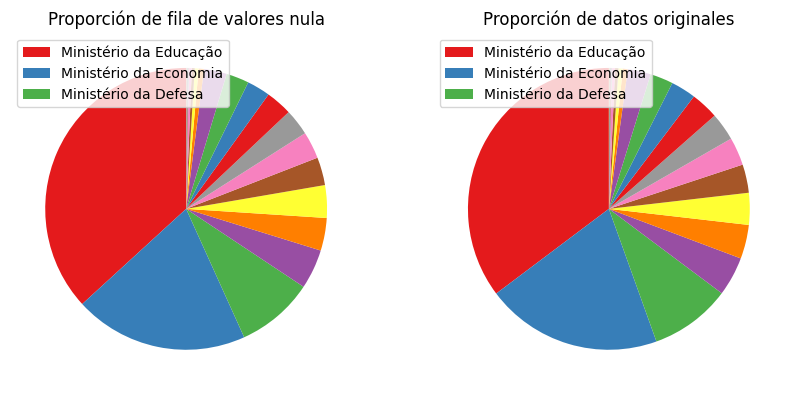

In [315]:
value_cols = df.filter(like="value")
df_vals_zeros = df[(value_cols.isna() | (value_cols == 0)).all(axis = 1)]
labels_sup = df_vals_zeros["name_superior_body"].value_counts().keys()
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Proporción de fila de valores nula")
patches, texts = plt.pie(x = df_vals_zeros["name_superior_body"].value_counts(), startangle=90, colors=sns.color_palette('Set1'))
plt.legend(patches, labels_sup[:3], loc="upper left")
plt.subplot(1,2,2)
plt.title("Proporción de datos originales")
patches, texts = plt.pie(x = df["name_superior_body"].value_counts(), startangle=90, colors=sns.color_palette('Set1'))
plt.legend(patches, df["name_superior_body"].value_counts().keys()[:3], loc="upper left")

plt.show()

In [321]:
df_vals_zeros["name_superior_body"].value_counts(normalize=True)

name_superior_body
Ministério da Educação                           0.368019
Ministério da Economia                           0.199565
Ministério da Defesa                             0.089152
Ministério da Agricultura, Pecuária e Abastec    0.045474
Ministério da Saúde                              0.037442
Ministério da Justiça e Segurança Pública        0.037419
Ministério da Infraestrutura                     0.032056
Ministério do Desenvolvimento Regional           0.031064
Ministério de Minas e Energia                    0.030237
Ministério da Ciência, Tecnologia, Inovações     0.030214
Ministério das Comunicações                      0.026741
Ministério do Turismo                            0.026198
Ministério do Meio Ambiente                      0.026080
Ministério da Cidadania                          0.006142
Presidência da República                         0.004465
Ministério das Relações Exteriores               0.003284
Advocacia-Geral da União                         0.00

In [320]:

df["name_superior_body"].value_counts(normalize=True)

name_superior_body
Ministério da Educação                           0.352619
Ministério da Economia                           0.202208
Ministério da Defesa                             0.093010
Ministério da Agricultura, Pecuária e Abastec    0.044967
Ministério da Justiça e Segurança Pública        0.038959
Ministério da Infraestrutura                     0.036532
Ministério da Saúde                              0.032545
Ministério de Minas e Energia                    0.032168
Ministério da Ciência, Tecnologia, Inovações     0.032020
Ministério do Desenvolvimento Regional           0.031884
Ministério das Comunicações                      0.028739
Ministério do Meio Ambiente                      0.026458
Ministério do Turismo                            0.026429
Ministério da Cidadania                          0.005751
Presidência da República                         0.004844
Advocacia-Geral da União                         0.003810
Ministério das Relações Exteriores               0.00

Observamos que, comparando con las proporciones de datos originales, no hay una concentración muy distinta de estos valores cero para 
los diferentes cuerpos superiores. Esto puede significar que los datos se han borrado (accidentalmente o no) de manera uniforme.
Esta información puede resultar útil en caso de necesitar realizar una investigación para optimizar los registros de actividad económica.

Otro factor que podría ser relevante sería el año fiscal de estos registros. Para ello veamos las concentraciones de estos en cuanto a año y comparemos con los originales.

In [323]:
print("Datos con nulos (proporción de nulos respecto al total de nulos)")
print(df_vals_zeros["financial_year"].value_counts(normalize=True).sort_index())
print("\nDatos originales")
print(df["financial_year"].value_counts(normalize=True).sort_index())

Datos con nulos (proporción de nulos respecto al total de nulos)
financial_year
2013.0    0.002431
2014.0    0.003459
2015.0    0.001963
2016.0    0.145599
2017.0    0.188163
2018.0    0.204268
2019.0    0.196555
2020.0    0.118742
2021.0    0.138820
Name: proportion, dtype: float64

Datos originales
financial_year
2013.0    0.004383
2014.0    0.004436
2015.0    0.004407
2016.0    0.189548
2017.0    0.185598
2018.0    0.169487
2019.0    0.172297
2020.0    0.138700
2021.0    0.131144
Name: proportion, dtype: float64


Mantenemos la consistencia en cuanto a cantidad de datos, donde de 2013 a 2015 hay una menor cantidad y en el resto de años sube. Esto podría indicar un fallo en el sistema de registro de datos, como indicado previamente, aunque si nos fijamos en años como el 2015 vemos una clara bajada en su proporción con respecto al conjunto de datos completo. Esto puede haberse dado por algún cambio que se produjo ese año en el sistema de registro.

Ahora que hemos explorado brevemente estos datos, vamos a proceder eliminando estos datos de nuestro dataframe.

In [324]:
df_clean = df.drop(df_vals_zeros.index)

In [327]:
print(f"Datos eliminados: {(df.shape[0] - df_clean.shape[0])/df.shape[0]*100:.4f}%")

Datos eliminados: 4.1686%


Ahora vamos a ver la consistencia de las categorías económicas.

In [328]:
df_clean["economy_category"].unique()

array(['Receitas Correntes', 'Receitas de Capital', 'Sem informação',
       'Receitas Correntes - intra-orçamentárias',
       'Receitas de Capital - intra-orçamentárias'], dtype=object)

Observamos que para las dos categorías económicas principales tenemos variaciones: intra-orçamentárias. Estas indican que las transacciones se produjeron dentro del mismo presupuesto gubernamental, es decir, que son transacciones internas las cuales no reflejan nuevos ingresos externos. Sirven como información adicional sobre el origen y el impacto de las transacciones. Según el diccionario de datos, no se menciona esta subcategoría, por lo que en principio podríamos agruparlas en su categoría principal y crear una columna nueva para las subcategorías.

In [330]:
df_clean["economy_subcategory"] = df_clean.apply(subcategory, axis = 1)

In [331]:
df_clean["economy_category"] = df_clean["economy_category"].str.replace(" - intra-orçamentárias", "")

In [332]:
df_clean.columns

Index(['superior_body_code', 'name_superior_body', 'organ_code', 'organ_name',
       'management_unit_code', 'name_management_unit', 'economy_category',
       'source_revenue', 'recipe_species', 'detailing',
       'updated_estimated_value', 'value_launched', 'realized_value',
       'percentage_realized', 'release_date', 'financial_year',
       'economy_subcategory'],
      dtype='object')

In [336]:
df_category = pd.DataFrame(df_clean.groupby(["economy_category", "economy_subcategory"]).size())
df_category

0
economy_category    economy_subcategory        
Receitas Correntes  extra-orçamentárias  921634
                    intra-orçamentárias   15134
Receitas de Capital extra-orçamentárias   28200
                    intra-orçamentárias      88
Sem informação      sem informação        18461

Ahora que hemos organizado bien las categorías y limpiado los datos podemos proceder con el EDA.

In [338]:
df_clean.to_csv("../datos/df_clean.csv")